### Importing required libraries, and loading the master dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
data = pd.read_excel("master_data.xlsx")
data.head(5)

,Unnamed: 0,Age,City,Company,Cost of Trip,Customer ID,Date of Travel,Gender,Income (USD/Month),KM Travelled,Payment_Mode,Price Charged,Transaction ID
0,0,28,ATLANTA GA,Pink Cab,313.6350,29290,08/01/2016,Male,10813,30.45,Card,370.95,10000011
1,1,28,ATLANTA GA,Yellow Cab,317.4228,29290,21/07/2018,Male,10813,26.19,Cash,598.70,10351127
2,2,28,ATLANTA GA,Yellow Cab,597.4020,29290,23/11/2018,Male,10813,42.55,Card,792.05,10412921
3,3,27,ATLANTA GA,Pink Cab,334.8540,27703,06/01/2016,Male,9237,28.62,Card,358.52,10000012
4,4,27,ATLANTA GA,Yellow Cab,467.1192,27703,21/04/2018,Male,9237,36.38,Card,721.10,10320494


### Making Inferences from the dataset

In [3]:
#converting Date column from string to date format
from datetime import datetime
data["Date of Travel"] = data["Date of Travel"].apply(lambda x:datetime.strptime(x, '%d/%m/%Y'))
data["Date of Travel"]

0        2016-01-08
1        2018-07-21
2        2018-11-23
3        2016-01-06
4        2018-04-21
            ...    
440329   2018-01-03
440330   2018-01-05
440331   2018-01-04
440332   2018-01-06
440333   2018-01-04
Name: Date of Travel, Length: 440334, dtype: datetime64[ns]

In [4]:
#splitting the Date column, based on year, month , and day
data["Year"] = data["Date of Travel"].map(lambda x: x.year)
data["Month"] = data["Date of Travel"].map(lambda x: x.month)
data["Day"] = data["Date of Travel"].map(lambda x: x.day)
data

,Unnamed: 0,Age,City,Company,Cost of Trip,Customer ID,Date of Travel,Gender,Income (USD/Month),KM Travelled,Payment_Mode,Price Charged,Transaction ID,Year,Month,Day
0,0,28,ATLANTA GA,Pink Cab,313.6350,29290,2016-01-08,Male,10813,30.45,Card,370.950000,10000011,2016,1,8
1,1,28,ATLANTA GA,Yellow Cab,317.4228,29290,2018-07-21,Male,10813,26.19,Cash,598.700000,10351127,2018,7,21
2,2,28,ATLANTA GA,Yellow Cab,597.4020,29290,2018-11-23,Male,10813,42.55,Card,792.050000,10412921,2018,11,23
3,3,27,ATLANTA GA,Pink Cab,334.8540,27703,2016-01-06,Male,9237,28.62,Card,358.520000,10000012,2016,1,6
4,4,27,ATLANTA GA,Yellow Cab,467.1192,27703,2018-04-21,Male,9237,36.38,Card,721.100000,10320494,2018,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440329,440329,33,SILICON VALLEY,Yellow Cab,172.8720,12490,2018-01-03,Male,18713,13.72,Cash,277.970000,10439799,2018,1,3
440330,440330,30,NEW YORK NY,Yellow Cab,284.6100,14971,2018-01-05,Male,15346,33.35,Card,423.205818,10439820,2018,1,5
440331,440331,38,TUCSON AZ,Yellow Cab,232.5600,41414,2018-01-04,Male,3960,19.00,Card,303.770000,10439838,2018,1,4
440332,440332,23,TUCSON AZ,Yellow Cab,70.5600,41677,2018-01-06,Male,19454,5.60,Cash,92.420000,10439840,2018,1,6


In [5]:
city = pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
data = pd.merge(data, city, on = "City", how = "left")
data.head(5)

,Unnamed: 0,Age,City,Company,Cost of Trip,Customer ID,Date of Travel,Gender,Income (USD/Month),KM Travelled,Payment_Mode,Price Charged,Transaction ID,Year,Month,Day,Population,Users
0,0,28,ATLANTA GA,Pink Cab,313.6350,29290,2016-01-08,Male,10813,30.45,Card,370.95,10000011,2016,1,8,"814,885","24,701"
1,1,28,ATLANTA GA,Yellow Cab,317.4228,29290,2018-07-21,Male,10813,26.19,Cash,598.70,10351127,2018,7,21,"814,885","24,701"
2,2,28,ATLANTA GA,Yellow Cab,597.4020,29290,2018-11-23,Male,10813,42.55,Card,792.05,10412921,2018,11,23,"814,885","24,701"
3,3,27,ATLANTA GA,Pink Cab,334.8540,27703,2016-01-06,Male,9237,28.62,Card,358.52,10000012,2016,1,6,"814,885","24,701"
4,4,27,ATLANTA GA,Yellow Cab,467.1192,27703,2018-04-21,Male,9237,36.38,Card,721.10,10320494,2018,4,21,"814,885","24,701"


### Profit Analysis

In [168]:
#grouping the profit based on company, total number of rides, and profit per ride for each company
data.drop("Unnamed: 0", axis = 1, inplace = True)
data["Profit"] = data["Price Charged"] - data["Cost of Trip"]
profit_comp = pd.DataFrame()
profit_comp["Profit_in_000"] = data.groupby("Company")["Profit"].sum()/1000
profit_comp["Total_trips"] = data.groupby("Company")["Transaction ID"].count()
profit_comp["Profit_per_ride"] = (profit_comp["Profit_in_000"] / profit_comp["Total_trips"])*1000
pd.DataFrame(profit_comp)

,Profit_in_000,Total_trips,Profit_per_ride
Company,,,
Pink Cab,5313.346112,84795,62.661078
Yellow Cab,54228.562631,355539,152.524934


<AxesSubplot: xlabel='Year', ylabel='Profit'>

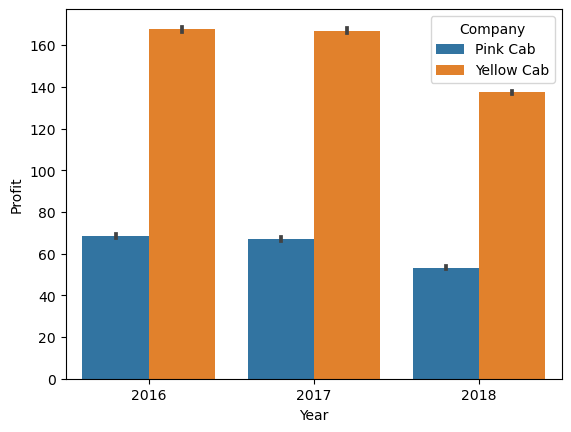

In [8]:
#Average profit year wise
sb.barplot(x = data["Year"], y = data["Profit"], hue = data["Company"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440334 entries, 0 to 440333
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Age                 440334 non-null  int64         
 1   City                440334 non-null  object        
 2   Company             440334 non-null  object        
 3   Cost of Trip        440334 non-null  float64       
 4   Customer ID         440334 non-null  int64         
 5   Date of Travel      440334 non-null  datetime64[ns]
 6   Gender              440334 non-null  object        
 7   Income (USD/Month)  440334 non-null  int64         
 8   KM Travelled        440334 non-null  float64       
 9   Payment_Mode        440334 non-null  object        
 10  Price Charged       440334 non-null  float64       
 11  Transaction ID      440334 non-null  int64         
 12  Year                440334 non-null  int64         
 13  Month               440334 no

Text(0.5, 1.0, 'Citywise Profitable rides%')

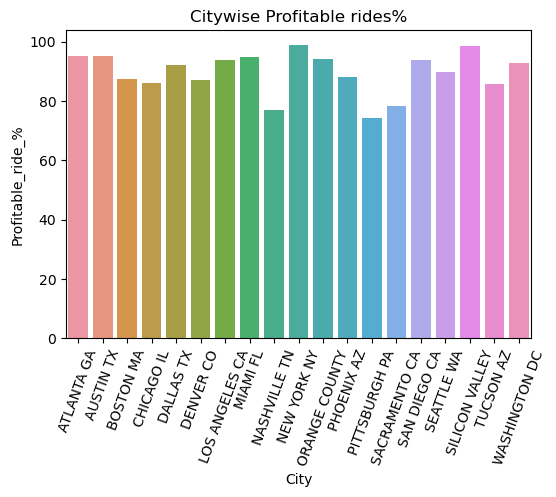

In [203]:
samp = data[data["Profit"]>0]
sample = pd.DataFrame(samp.groupby("City")["Profit"].count())
plt.figure(figsize = (6,4))
sample["Total rides"] = pd.DataFrame(data.groupby("City")["Profit"].count())
sample["Profitable_ride_%"] = (sample["Profit"]/sample["Total rides"])*100
sb.barplot(data = sample, x = sample.index, y = "Profitable_ride_%")
plt.xticks(rotation=70)
plt.title("Citywise Profitable rides%")

###### Thus overall profit is highest for yello cab, and maximum is year 2016, and 2017

In [10]:
#understanding the numerical data
data["Population"] = data["Population"].apply(lambda x: x.replace ("," , ""))
data["Users"] = data["Users"].apply(lambda x: x.replace ("," , ""))
data["Population"] = data["Population"].astype("int64")
data["Users"] = data["Users"].astype("int64")
num_data = data.drop(["Year", "Month", "Day"], axis = 1)
num_data = num_data.select_dtypes(include = np.number)
num_data.describe()

,Age,Cost of Trip,Customer ID,Income (USD/Month),KM Travelled,Price Charged,Transaction ID,Population,Users,Profit
count,440334.000000,440334.000000,440334.000000,440334.000000,440334.000000,440334.000000,4.403340e+05,4.403340e+05,440334.000000,440334.000000
mean,35.358437,285.664384,23608.521743,15091.637938,22.551208,420.884260,1.022007e+07,4.095133e+06,184622.658675,135.219876
std,12.580202,143.700091,21195.343858,7988.102626,11.269860,245.893882,1.270495e+05,3.624072e+06,106762.476947,142.020958
min,18.000000,19.000000,1.000000,2000.000000,1.900000,15.600000,1.000001e+07,2.489680e+05,3643.000000,-220.060000
25%,25.000000,178.568000,3524.000000,8391.000000,13.940000,244.800000,1.011004e+07,9.429080e+05,80021.000000,36.548300
50%,33.000000,284.610000,15084.000000,14768.500000,22.513607,406.859455,1.022006e+07,1.955130e+06,164468.000000,102.630400
75%,42.000000,385.560000,43882.000000,21085.000000,31.040000,536.200000,1.033010e+07,8.405837e+06,302149.000000,172.628000
max,65.000000,691.200000,60000.000000,35000.000000,48.000000,1230.266700,1.044011e+07,8.405837e+06,302149.000000,930.631500


### checking correlation between the numerical variables


In [11]:
pd.DataFrame(num_data.corr())

,Age,Cost of Trip,Customer ID,Income (USD/Month),KM Travelled,Price Charged,Transaction ID,Population,Users,Profit
Age,1.000000,-0.000625,-0.002028,-0.000712,0.000289,-0.002602,-0.001056,-0.004600,-0.002591,-0.003874
Cost of Trip,-0.000625,1.000000,-0.000616,-0.001615,0.957059,0.862369,-0.002968,0.008071,0.016023,0.481275
Customer ID,-0.002028,-0.000616,1.000000,-0.005714,-0.000865,-0.163453,-0.021334,-0.231451,-0.237828,-0.282377
Income (USD/Month),-0.000712,-0.001615,-0.005714,1.000000,0.001351,0.004623,-0.000982,0.015100,0.013841,0.009638
KM Travelled,0.000289,0.957059,-0.000865,0.001351,1.000000,0.829559,-0.001688,-0.003607,-0.001971,0.467918
Price Charged,-0.002602,0.862369,-0.163453,0.004623,0.829559,1.000000,-0.045562,0.260153,0.230845,0.858827
Transaction ID,-0.001056,-0.002968,-0.021334,-0.000982,-0.001688,-0.045562,1.000000,0.008626,0.001928,-0.075882
Population,-0.004600,0.008071,-0.231451,0.015100,-0.003607,0.260153,0.008626,1.000000,0.939070,0.442261
Users,-0.002591,0.016023,-0.237828,0.013841,-0.001971,0.230845,0.001928,0.939070,1.000000,0.383471
Profit,-0.003874,0.481275,-0.282377,0.009638,0.467918,0.858827,-0.075882,0.442261,0.383471,1.000000


<AxesSubplot: >

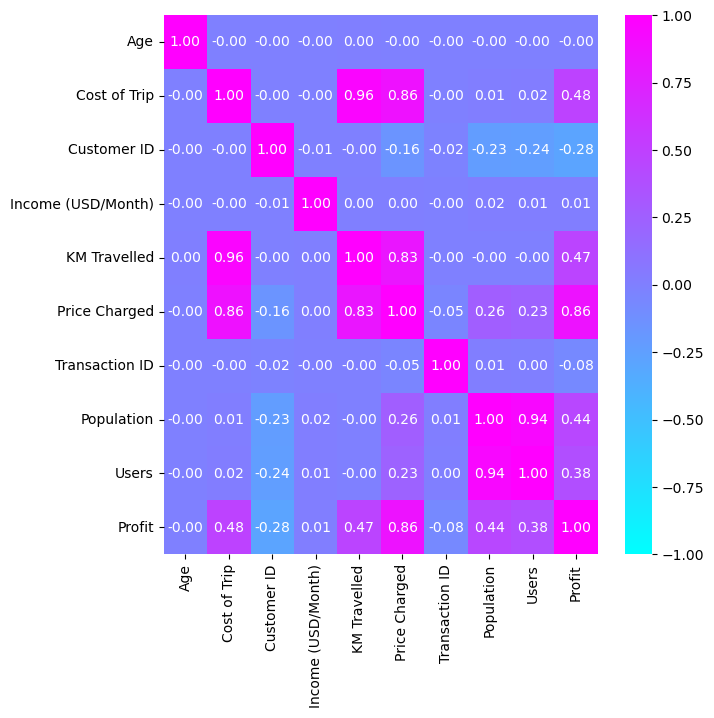

In [12]:

plt.figure(figsize = (7,7))
sb.heatmap(num_data.corr(), vmin = -1, vmax = 1, cmap = "cool",annot = True, fmt="0.2f")

##### hence we can see that there is strong positive correlation between KM travelled and Cost of Trip, as when no of KM increase, Cost will also increase
#there is also strong positive correlation between KM travelled and Price Charged, and between Price Charged and cost of trip, as when the cost of trip increases, price will also increase

##### There is also correlation between the Number of Users and population, as more the population in a city, more will be the number of users

Text(0.5, 1.0, 'Total Trips per Company')

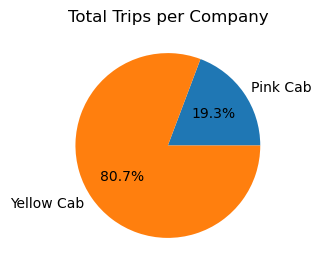

In [166]:
#Number of trips per Company
comp = data.groupby("Company")["Transaction ID"].count()
plt.figure(figsize = (3,3))
plt.pie(comp.values, labels=comp.index, autopct = '%1.1f%%')
plt.title("Total Trips per Company")

In [13]:
#checking which cab users prefer more
comp = data.groupby("Company")["Users"].mean()
comp

Company
Pink Cab      125619.355068
Yellow Cab    198694.772084
Name: Users, dtype: float64

Text(0.5, 1.0, 'Average Users per Company')

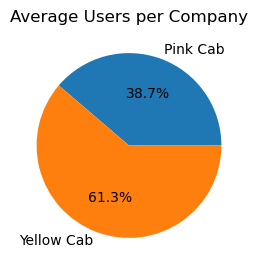

In [14]:
plt.figure(figsize = (3,3))
plt.pie(comp.values, labels=comp.index, autopct = '%1.1f%%')
plt.title("Average Users per Company")

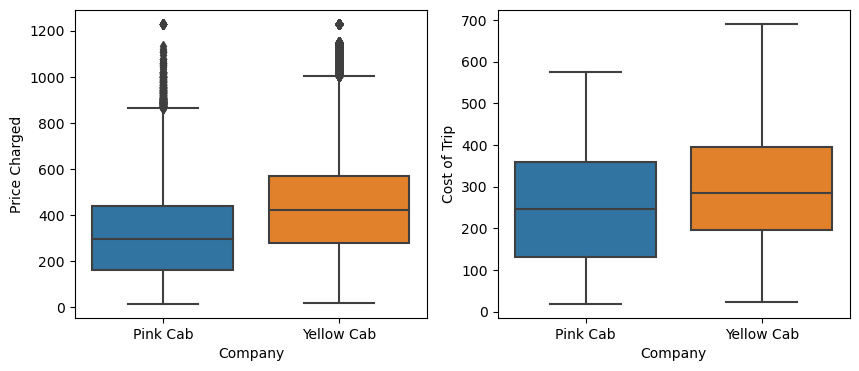

In [15]:
#plotting the price charged per company
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.boxplot(x = data["Company"], y = data["Price Charged"])
plt.subplot(1,2,2)
sb.boxplot(x = data["Company"], y = data["Cost of Trip"])
plt.show()

##### hence price charged by yellow cab is almost twice that of pink cab, however differnce between the cost of trip is not that much

Text(0.5, 1.0, 'Citywise Profit')

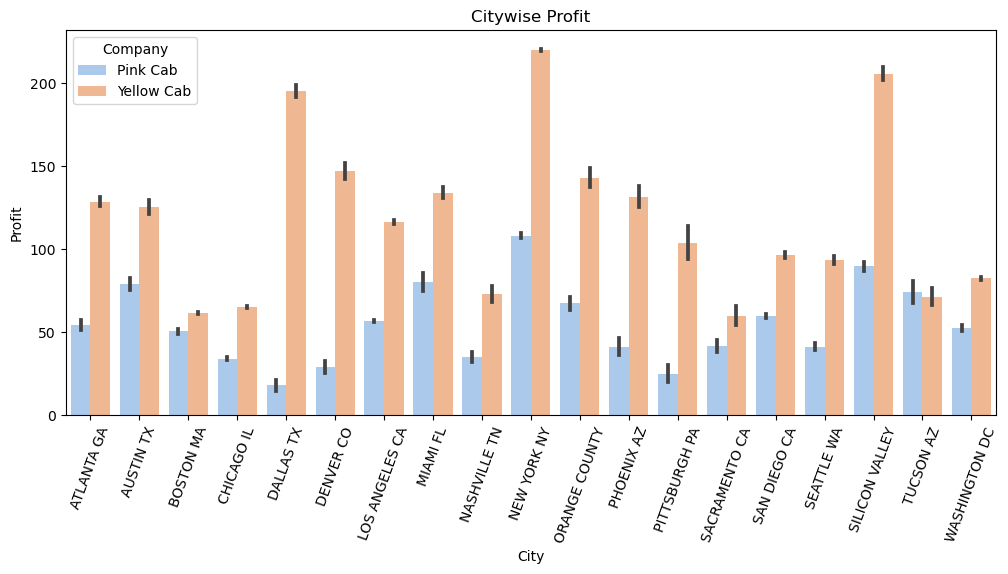

In [16]:
#Calculating citywise profit for each company
plt.figure(figsize=(12,5))
sb.barplot(data = data, x = "City", y = "Profit", hue = "Company", palette= "pastel")
plt.xticks(rotation=70)
plt.title("Citywise Profit")


##### hence we can see that highest profit is in NewYork City, followed by Silicon Valley

Text(0.5, 1.0, 'Genderwise Profit')

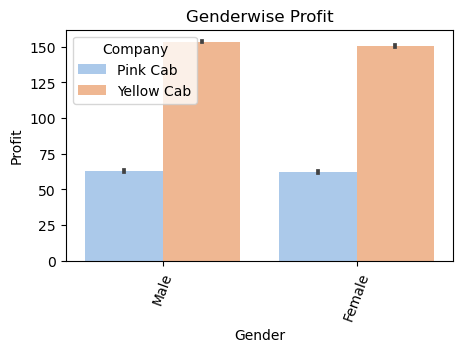

In [17]:
#checking gender wise profit for each company
plt.figure(figsize=(5,3))
sb.barplot(data = data, x = "Gender", y = "Profit", hue = "Company", palette= "pastel")
plt.xticks(rotation=70)
plt.title("Genderwise Profit")

##### hence we can see that there is no differnce in the profit based on Gender

Text(0.5, 1.0, 'Average Users per Gender')

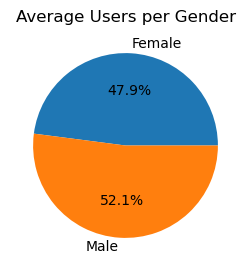

In [18]:
#checking the % of gender users
gen = data.groupby("Gender")["Users"].mean()
plt.figure(figsize = (3,3))
plt.pie(gen.values, labels=gen.index, autopct = '%1.1f%%')
plt.title("Average Users per Gender")

##### hence the number of males and females are almost same

In [19]:
#checking the number of users city wise
pd.DataFrame(data.groupby("City")["Users"].mean()).sort_values(by = "Users",ascending = False)

,Users
City,
NEW YORK NY,302149.0
CHICAGO IL,164468.0
LOS ANGELES CA,144132.0
WASHINGTON DC,127001.0
BOSTON MA,80021.0
SAN DIEGO CA,69995.0
SILICON VALLEY,27247.0
SEATTLE WA,25063.0
ATLANTA GA,24701.0


##### hence highest number of users are from New York, followed by Chicago and LA

In [20]:
#calculating profit based on the number of users per city
citi = data.groupby("City")["Users"].mean()
pd.DataFrame(data.groupby("City")["Profit"].sum()/citi.values).sort_values(by = "Profit", ascending = False)

,Profit
City,
NEW YORK NY,126.249019
DALLAS TX,50.851889
SILICON VALLEY,48.218246
MIAMI FL,42.893256
AUSTIN TX,35.245780
ORANGE COUNTY,35.089421
ATLANTA GA,34.140655
DENVER CO,32.082170
PHOENIX AZ,31.549638


##### highest profit per user is in New York , followed by Dallas, then Silicon valley

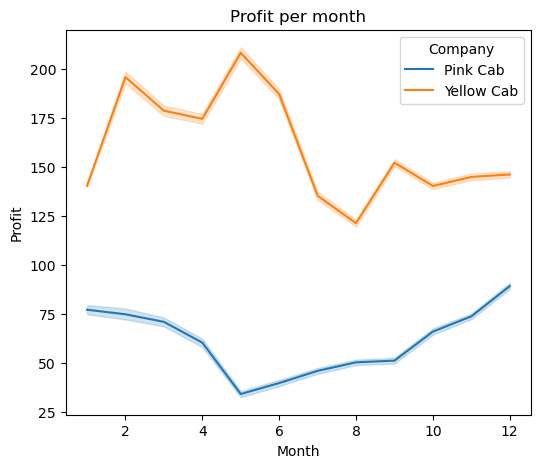

In [176]:
#plotting the profit per Month
plt.figure(figsize=(6,5))
sb.lineplot(data = data, x = "Month", y = "Profit", hue = "Company" , markers= "*")
plt.title("Profit per month")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.show()

##### The profit for yellow cab is highest in May, where as its lowest in May for Pink Cab

Text(0.5, 1.0, 'Citywise Users %')

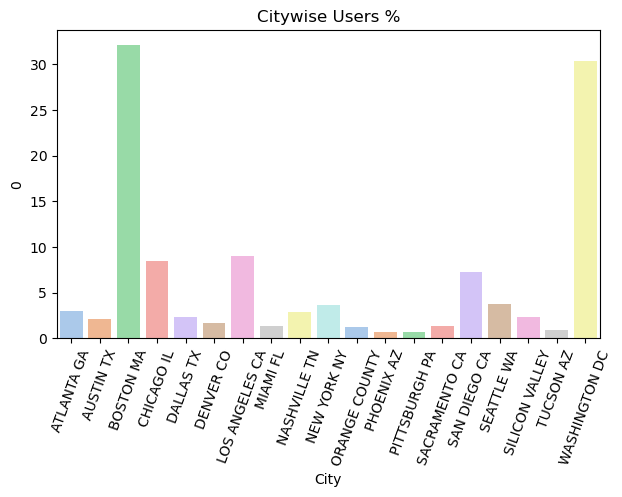

In [22]:
#City wise users %
user = pd.DataFrame((data["Users"]/data["Population"])*100)
plt.figure(figsize=(7,4))
sb.barplot(x = data["City"], y = user[0], palette= "pastel")
plt.xticks(rotation=70)
plt.title("Citywise Users %")

##### highest % of users are from Boston, fllowed by Washington

Text(0.5, 1.0, 'Agewise Profit')

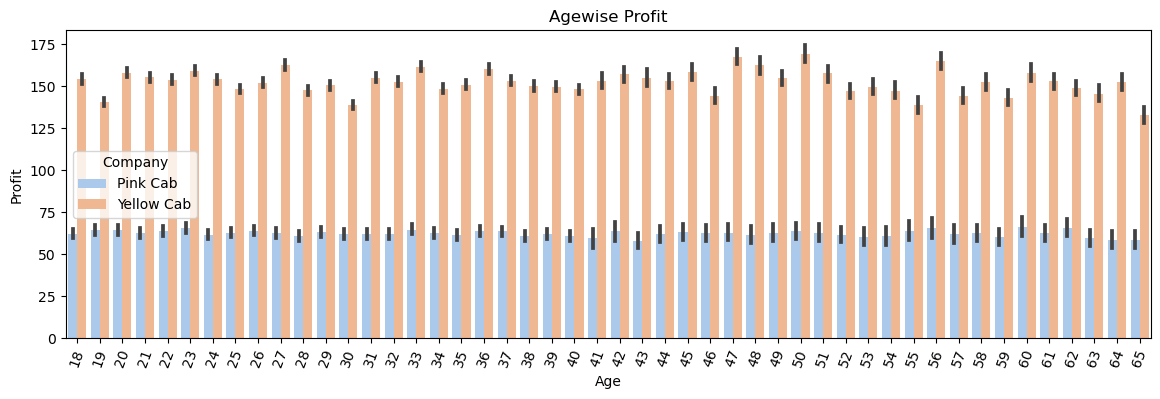

In [23]:
#checking the effect of User Age on profit
plt.figure(figsize=(14,4))
sb.barplot(data = data, x = "Age", y = "Profit",hue = "Company", palette= "pastel")
plt.xticks(rotation=70)
plt.title("Agewise Profit")


##### there is not much impact on the pofit based on age

Text(0.5, 1.0, 'Income wise Profit')

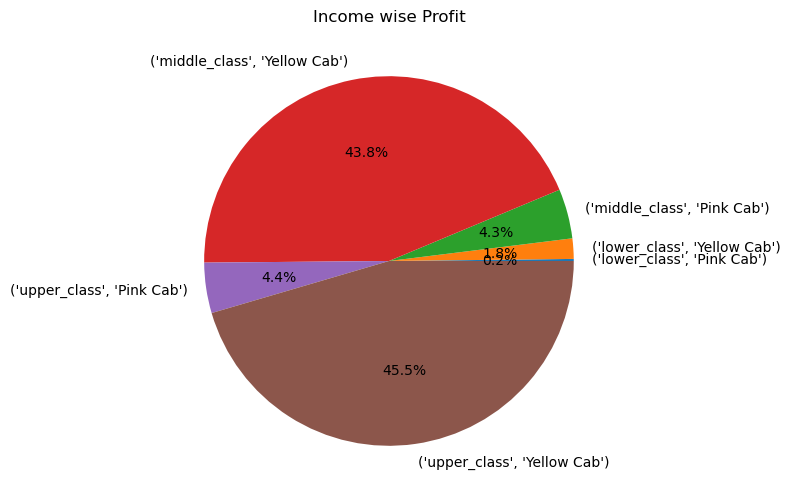

In [51]:
#effect of income on profit, creating bins for upper class, lower class, and middle class
slabs = pd.DataFrame(pd.cut(data["Income (USD/Month)"], bins = (0,2500,15000,36000), labels = ("lower_class", "middle_class", "upper_class")))
slabs["Profit"] = data["Profit"]
slabs["Company"] = data["Company"]
pro = slabs.groupby(["Income (USD/Month)", "Company"])["Profit"].sum().round()
plt.figure(figsize = (6,6))
plt.pie(pro.values, labels=pro.index, autopct = '%1.1f%%')
plt.title("Income wise Profit")

### hence we can see that total Profit is highest for Upper , and Middle Class people, i.e as income increases, usage increases

Text(0.5, 1.0, '% of users in each class')

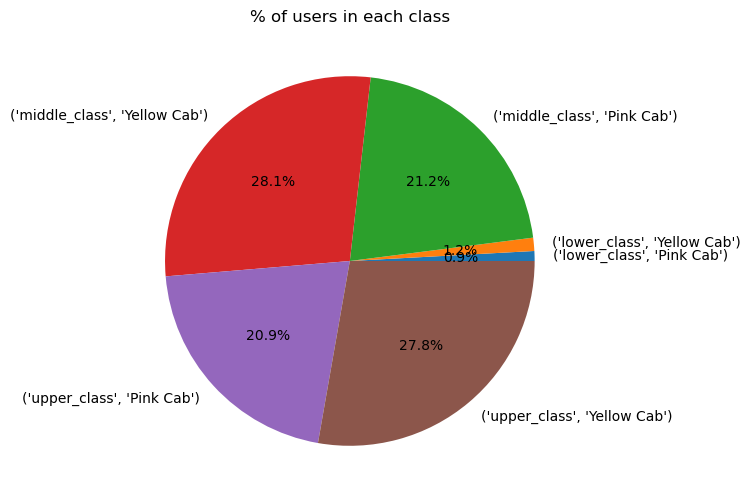

In [54]:
#number of users belonging to each class based on income, creating bins for upper class, lower class, and middle class
slabs = pd.DataFrame(pd.cut(data["Income (USD/Month)"], bins = (0,2500,15000,36000), labels = ("lower_class", "middle_class", "upper_class")))
slabs["Customer ID"] = data["Customer ID"]
slabs["Company"] = data["Company"]
user = slabs.groupby(["Income (USD/Month)", "Company"])["Customer ID"].nunique()
plt.figure(figsize = (6,6))
plt.pie(user.values, labels=user.index, autopct = '%1.1f%%')
plt.title("% of users in each class")

##### The number of users are highest for middle and upper class, where as least in lower class

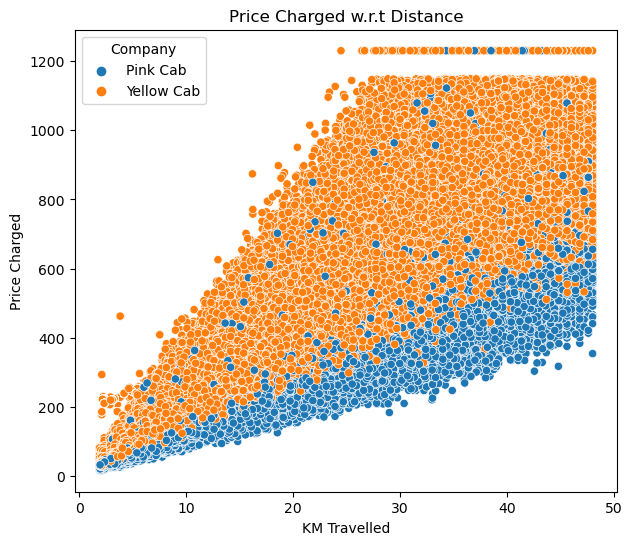

In [25]:
#effect of Price Charged, on KM travelled, and company
plt.figure(figsize = (7, 6))

sb.scatterplot(data=data, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged w.r.t Distance')
plt.ylabel('Price Charged')
plt.xlabel('KM Travelled')
plt.show()

#### there is a linear relation ship between the KM travelled and Price Charged

In [26]:
#checking Payment Method for Customers, for each company
pay = data.groupby(["Company","Payment_Mode"])["Customer ID"].nunique()
pay

Company     Payment_Mode
Pink Cab    Card            25283
            Cash            19957
Yellow Cab  Card            36758
            Cash            32112
Name: Customer ID, dtype: int64

Text(0.5, 1.0, 'Payment Mode - Gender wise')

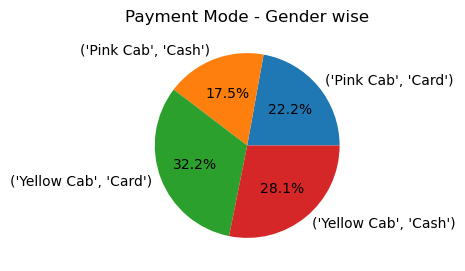

In [27]:

plt.figure(figsize = (3,3))
plt.pie(pay.values, labels=pay.index, autopct = '%1.1f%%')
plt.title("Payment Mode - Gender wise")

Text(0.5, 1.0, 'Average Number of Users per year for each Comapny')

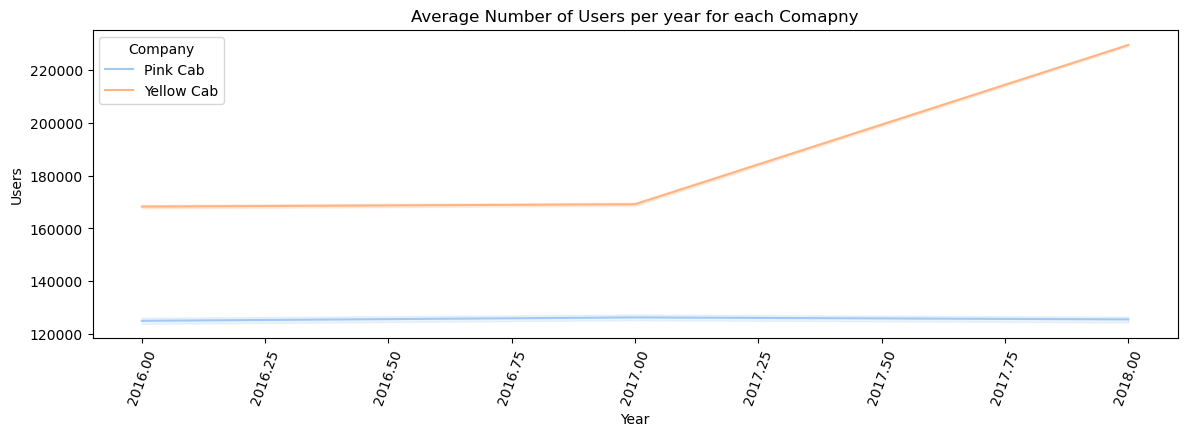

In [90]:
#Grouping the companies based on number of users at different time periods
plt.figure(figsize=(14,4))
sb.lineplot(data = data, x = "Year", y = "Users",hue = "Company", palette= "pastel")
plt.xticks(rotation=70)
plt.title("Average Number of Users per year for each Comapny")

##### The Number of Users for Yellow Cab have increased in 2018, however, its same throughout for Pink Cab

## Hypothesis and Reports


## Hypothesis 1: Is there any difference in Profit based on Gender 

###### H0:There is no difference regarding Gender on Price Charged
###### H1:There is a significant difference regarding Gender, and Price Charged

In [75]:
#For Pink Cab
from scipy import stats
H0 = data[(data["Gender"]=="Male") & (data["Company"] == "Pink Cab")]["Price Charged"].values
H1 = data[(data["Gender"]=="Female") & (data["Company"] == "Pink Cab")]["Price Charged"].values
_, p_value = stats.ttest_ind(H0,H1, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference on Price Charged regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender on Price Charged for Pink Cab')

P value is  0.7948285220235695
We accept null hypothesis (H0) that there is no difference regarding gender on Price Charged for Pink Cab


In [76]:
#For Yellow Cab

H0 = data[(data["Gender"]=="Male") & (data["Company"] == "Yellow Cab")]["Price Charged"].values
H1 = data[(data["Gender"]=="Female") & (data["Company"] == "Yellow Cab")]["Price Charged"].values
_, p_value = stats.ttest_ind(H0,H1, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference on Price Charged regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender on Price Charged for Yellow Cab')

P value is  0.08935817517722393
We accept null hypothesis (H0) that there is no difference regarding gender on Price Charged for Yellow Cab


##### We accept null hypothesis (H0) that there is no difference regarding gender on Price Charged for both the companies

### Hypothesis 2: Is there any difference in Profit based on Payment _Mode

##### H0:There is no difference in Profit based on Payment_Mode
##### H1:There is a significant difference in Profit based on Payment_Mode

In [118]:
H0 = data[(data["Payment_Mode"]=="Card")]["Price Charged"].values
H1 = data[(data["Payment_Mode"]=="Cash")]["Price Charged"].values
_, p_value = stats.ttest_ind(H0,H1, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference on Price Charged based on Payment_Mode')
else:
    print('We accept null hypothesis (H0) that there is no difference based on Payment_Mode on Price Charged')


P value is  0.9647870114202053
We accept null hypothesis (H0) that there is no difference based on Payment_Mode on Price Charged


### Hypothesis 3: Difference in Cost of Trip per KM for each Company

##### H0:There is no difference in Cost of Trip per KM for each Company
##### H1:There is a significant difference in Cost of Trip per KM for each Company

In [128]:
#calculating cost of Trip per KM
H0 = data[data["Company"] == "Pink Cab"]["Cost of Trip"]/data[data["Company"] == "Pink Cab"]["KM Travelled"]
H1 = data[data["Company"] == "Yellow Cab"]["Cost of Trip"]/data[data["Company"] == "Yellow Cab"]["KM Travelled"]

_, p_value = stats.ttest_ind(H0.values,H1.values, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in Cost of Trip pr KM for each Company')
else:
    print('We accept null hypothesis (H0) that there is no difference in Cost of Trip pr KM for each Company ')


P value is  0.0
We accept alternative hypothesis (H1) that there is a difference in Cost of Trip pr KM for each Company


Text(0.5, 1.0, 'Cost of Trip per KM for each Company')

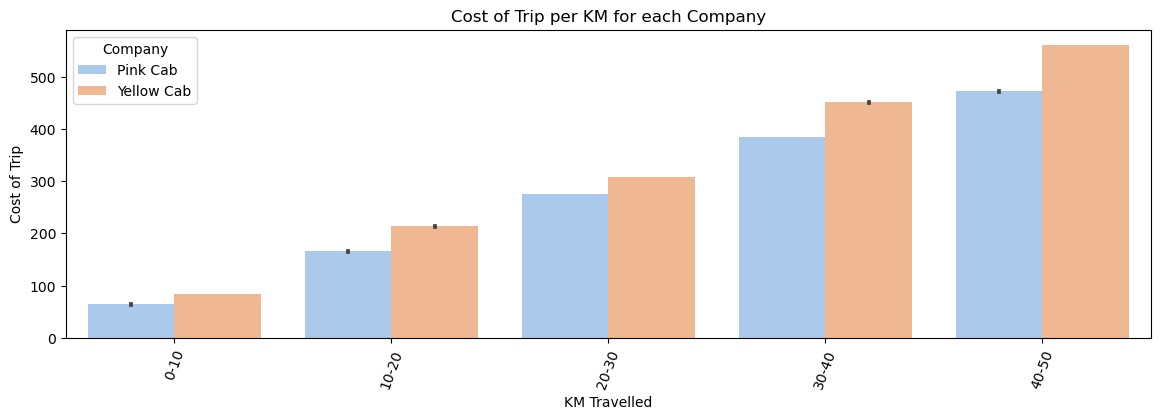

In [138]:
#plottingthe above hypothesis
#creating bins for KM travelled
slabs = pd.DataFrame(pd.cut(data["KM Travelled"], bins = (0,10,20,30,40,50), labels = ("0-10", "10-20", "20-30", "30-40", "40-50")))
plt.figure(figsize=(14,4))
sb.barplot( x =slabs["KM Travelled"], y = data["Cost of Trip"],hue = data["Company"], palette= "pastel")
plt.xticks(rotation=70)
plt.title("Cost of Trip per KM for each Company")

### Hypothesis 4: Difference in Average Price Charged for each Company

##### H0:There is no difference in Average Price Charged  for each Company
##### H1:There is a significant difference in Average Price Charged for each Company

In [142]:
H0 = data[data["Company"] == "Pink Cab"]["Price Charged"].values
H1 = data[data["Company"] == "Yellow Cab"]["Price Charged"].values

_, p_value = stats.ttest_ind(H0 ,H1 , equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in Average Price Charged for each Company')
else:
    print('We accept null hypothesis (H0) that there is no difference in Average Price Charged for each Company ')

P value is  0.0
We accept alternative hypothesis (H1) that there is a difference in Average Price Charged for each Company


Text(0.5, 1.0, 'Average Price Charged for each Company')

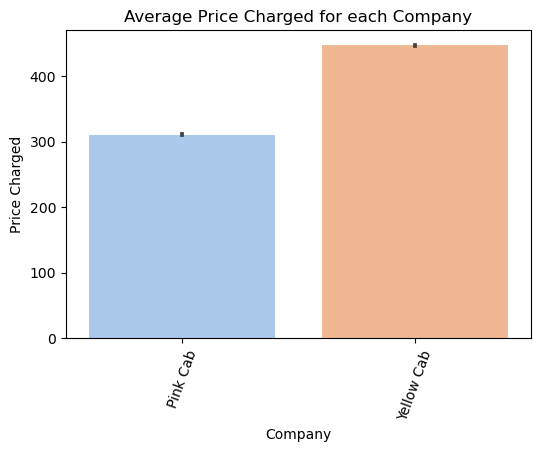

In [147]:
#plottingthe above hypothesis

plt.figure(figsize=(6,4))
sb.barplot( data = data, x ="Company", y = "Price Charged", palette= "pastel")
plt.xticks(rotation=70)
plt.title("Average Price Charged for each Company")

### Hypothesis 5: Difference in Profit per Company

##### H0:There is no difference in Profit per Company
##### H1:There is a significant difference in  Average Profit perCompany

In [148]:
H0 = data[data["Company"] == "Pink Cab"]["Profit"].values
H1 = data[data["Company"] == "Yellow Cab"]["Profit"].values

_, p_value = stats.ttest_ind(H0 ,H1 , equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in Average Profit for each Company')
else:
    print('We accept null hypothesis (H0) that there is no difference in Average Profit for each Company ')

P value is  0.0
We accept alternative hypothesis (H1) that there is a difference in Average Profit for each Company


Text(0.5, 1.0, 'Average Profit for each Company')

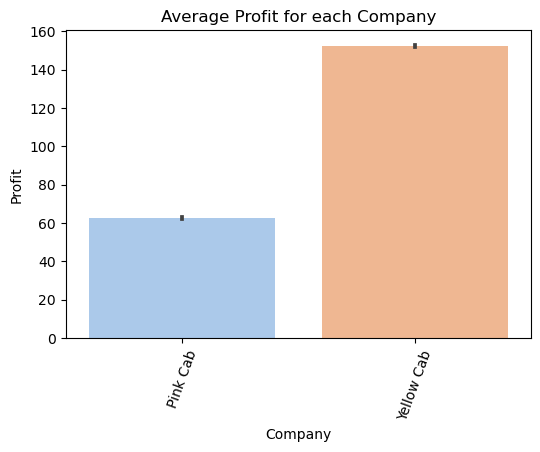

In [150]:
#plottingthe above hypothesis

plt.figure(figsize=(6,4))
sb.barplot( data = data, x ="Company", y = "Profit", palette= "pastel")
plt.xticks(rotation=70)
plt.title("Average Profit for each Company")

##### We can see that there is a significant difference between the Profits between the two Companies

### Customer Segmentation using K-Means Algorithm

In [153]:
num_data.drop(["Customer ID", "Transaction ID"], axis = 1, inplace = True)
num_data.head(2)

,Age,Cost of Trip,Income (USD/Month),KM Travelled,Price Charged,Population,Users,Profit
0,28,313.6350,10813,30.45,370.95,814885,24701,57.3150
1,28,317.4228,10813,26.19,598.70,814885,24701,281.2772


In [154]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
scaled_data = min_max.fit_transform(num_data)

In [155]:
#converting the scaled data back to DataFrame
num_scaled_data = pd.DataFrame(scaled_data, columns = num_data.columns)

In [156]:
#importing libraries
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

2 0.523822912020581
3 0.46377468828263296
4 0.4355439212940234
5 0.4161947564099713
6 0.3968383526794514
7 0.3842759100099704
8 0.3690331028123657
9 0.35646275708030045
10 0.34609005894582545
11 0.3344297262183196


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

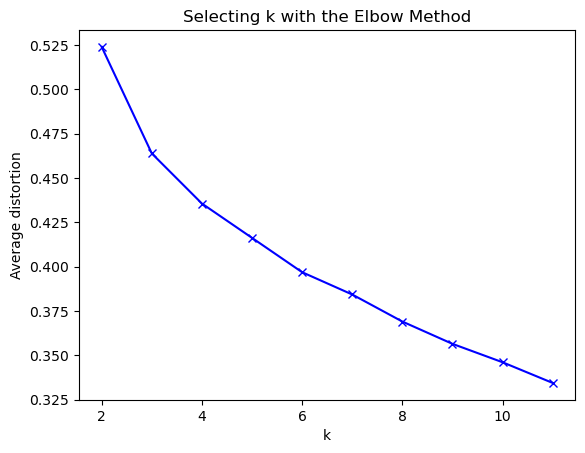

In [158]:
#checking elbow values for 2-12 range of clusters
clusters = range(2,12)
#creating an empty list and appending its vlues with cluster distances
distance = []
for i in clusters:
    model = KMeans(n_clusters = i, n_init = 15)
    model.fit(num_scaled_data)
    predictions = model.predict(num_scaled_data)
    #calulating sum of min distnace between each data point and cluster centers , using euclidean metrics then dividing it with the length of the file, to normalize it
    distortion = sum(np.min(cdist(num_scaled_data, model.cluster_centers_, metric = "euclidean"), axis = 1))/num_scaled_data.shape[0]
    #appending the empty list
    distance.append(distortion)
    print(i, distortion)
 
#plotting the clusters and distance
plt.plot(clusters, distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

##### elbow is tilting at point 3, hence selecting value of k as 3

In [159]:
#creating a DataFrame using cluster centroids using 3 clusters
kmeans = KMeans(n_clusters=3, n_init=15)
kmeans.fit(num_scaled_data)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = num_scaled_data.columns )
centroid_df

,Age,Cost of Trip,Income (USD/Month),KM Travelled,Price Charged,Population,Users,Profit
0,0.371368,0.200748,0.393699,0.226445,0.147682,0.104621,0.332461,0.226909
1,0.367286,0.398924,0.400833,0.446813,0.397618,1.000000,1.000000,0.374971
2,0.370095,0.598545,0.394025,0.681341,0.437362,0.104668,0.333478,0.300313


In [164]:
#creating a dataset using the cluster labels and the original data

num_data["KMeansLabel"] = kmeans.labels_
for i in num_data[["Age","Cost of Trip", "Income (USD/Month)", "KM Travelled", "Price Charged", "Population", "Users", "Profit"]]:
    print(i)
    print (pd.DataFrame(num_data.groupby('KMeansLabel').describe().round()[i][['count','mean','min','max']]))

Age
                count  mean   min   max
KMeansLabel                            
0            132858.0  35.0  18.0  65.0
1            180431.0  35.0  18.0  65.0
2            127045.0  35.0  18.0  65.0
Cost of Trip
                count   mean    min    max
KMeansLabel                               
0            132858.0  154.0   19.0  333.0
1            180431.0  287.0   19.0  691.0
2            127045.0  421.0  208.0  691.0
Income (USD/Month)
                count     mean     min      max
KMeansLabel                                    
0            132858.0  14995.0  2000.0  35000.0
1            180431.0  15227.0  2010.0  34989.0
2            127045.0  15000.0  2000.0  34996.0
KM Travelled
                count  mean   min   max
KMeansLabel                            
0            132858.0  12.0   2.0  28.0
1            180431.0  22.0   2.0  48.0
2            127045.0  33.0  16.0  48.0
Price Charged
                count   mean    min     max
KMeansLabel                           

##### Characteristics for each Segment 
We can see that the Segmentations are done based on Profit, for segment 1 Profit is Max, followed by Segment 2 leat profit is for segment 0, however Price Charged is highest for 2nd Segment, as well as no of KM travelled , and Cost of Trip is highest for 2nd Segment

Hence we can say that the company in the 2nd Segment does not charge very high for its trips, even though the cost price of the trip is more, i.e it makes less profit, As these are the characteristics of Pink Cab cmpany, we can say that most of the trips in 2nd Segment are from Pink Cab Company

Number of Users are also Maximum in the Segment 1, Segment 0, and 1 have almost same number of users



##### Conclusion

The Number of Trips for Pink Cab is very less when compared to the number of trips for Yellow Cab, even though Pink Cab charges less for its trips - this can be due to a number of factors, such as:
Availability of Cab
Service provided
Number of Accidents per Company
etc

Hence, for Investment purpose , Recommendation would be to go for a Yellow Cab, due to its popularity and high Profit

However if one is looking for a cheaper Cab Company, Pink Cab is more recommended